In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    np.random.choice(indices)

In [4]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)

In [5]:
env = gym.make('FrozenLake-v3')

In [6]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

In [13]:
rList = []

for i in range(num_episodes):
    state, _ = env.reset()
    rAll = 0
    done = False

    while not done:
        action = rargmax(Q[state, :])

        new_state, reward, done, truncated, info = env.step(action)

        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

Success rate: 0.8815
Final Q-Table Values
LEFT DOWN RIGHT UP


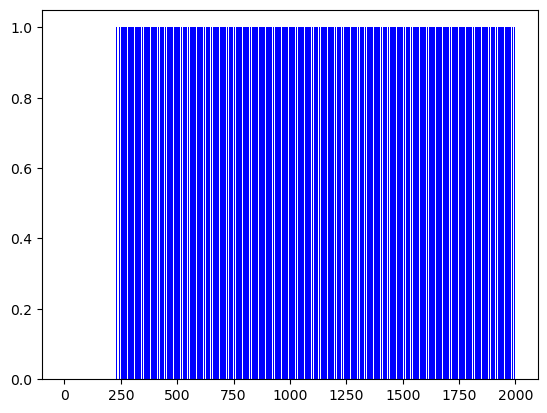

In [19]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [20]:
print(Q)

[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
